In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


## Data Preprocessing

In [12]:
training_set = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True).flow_from_directory(
    'Plant_Disease_Dataset/train',
   target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)


Found 70295 images belonging to 38 classes.


In [13]:
Validation_set = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       #data augmantation
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True).flow_from_directory(
    'Plant_Disease_Dataset/valid',
 target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

Found 17572 images belonging to 38 classes.


In [14]:

model = models.Sequential([
  
    layers.Flatten(input_shape=(128, 128, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')

])


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 512)               25166336  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 38)                9766      
                                                                 
Total params: 25,307,430
Trainable params: 25,307,430
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(
    training_set,
    validation_data=Validation_set,
    epochs=17
)


Epoch 1/17
2197/2197 [==============================] - 187s 85ms/step - loss: 3.4454 - accuracy: 0.0749 - val_loss: 3.2888 - val_accuracy: 0.0970
Epoch 2/17
2197/2197 [==============================] - 194s 88ms/step - loss: 3.1709 - accuracy: 0.1132 - val_loss: 3.0114 - val_accuracy: 0.1497
Epoch 3/17
2197/2197 [==============================] - 174s 79ms/step - loss: 2.9613 - accuracy: 0.1562 - val_loss: 2.8230 - val_accuracy: 0.1860
Epoch 4/17
2197/2197 [==============================] - 177s 81ms/step - loss: 2.7705 - accuracy: 0.1958 - val_loss: 2.5915 - val_accuracy: 0.2462
Epoch 5/17
2197/2197 [==============================] - 177s 81ms/step - loss: 2.6204 - accuracy: 0.2264 - val_loss: 2.4930 - val_accuracy: 0.2690
Epoch 6/17
2197/2197 [==============================] - 156s 71ms/step - loss: 2.5197 - accuracy: 0.2522 - val_loss: 2.3751 - val_accuracy: 0.2976
Epoch 7/17
2197/2197 [==============================] - 189s 86ms/step - loss: 2.4281 - accuracy: 0.2776 - val_loss: 2

## Saving Model

In [18]:
history.history #Return Dictionary of history

{'loss': [3.445403814315796,
  3.1708850860595703,
  2.961292028427124,
  2.770500898361206,
  2.6204066276550293,
  2.519707679748535,
  2.428116798400879,
  2.3485023975372314,
  2.276747703552246,
  2.224041223526001,
  2.1757445335388184,
  2.138927936553955,
  2.1013033390045166,
  2.0696465969085693,
  2.0358495712280273,
  2.004568099975586,
  1.9736248254776],
 'accuracy': [0.07487019151449203,
  0.11323707550764084,
  0.1562415510416031,
  0.19580340385437012,
  0.2264314740896225,
  0.25220856070518494,
  0.27764421701431274,
  0.30265310406684875,
  0.3168788552284241,
  0.3302510976791382,
  0.3436233103275299,
  0.35453444719314575,
  0.36612844467163086,
  0.37443631887435913,
  0.3869549632072449,
  0.39494985342025757,
  0.4051070511341095],
 'val_loss': [3.288803815841675,
  3.0114030838012695,
  2.8230130672454834,
  2.591538906097412,
  2.492967128753662,
  2.3750877380371094,
  2.290117025375366,
  2.2360026836395264,
  2.221726894378662,
  2.1521713733673096,
  2.0

In [19]:
import json

In [20]:

with open('training_hist_ann.json', 'w') as f:
    json.dump(history.history, f)

In [21]:
model.save('Trained_plant_disease_model_ANN.keras')

## Load model

In [22]:
model = tf.keras.models.load_model('Trained_plant_disease_model_ANN.keras')



## Evaluate Model

In [23]:
loss, acc = model.evaluate(Validation_set)
print(f"Validation Accuracy: {acc:.2f}")


103/550 [====>.........................] - ETA: 24s - loss: 2.2490 - accuracy: 0.3377

550/550 [==============================] - 31s 56ms/step - loss: 1.8968 - accuracy: 0.4288
Validation Accuracy: 0.43


In [24]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

  10/2197 [..............................] - ETA: 2:04 - loss: 1.9709 - accuracy: 0.3625

2197/2197 [==============================] - 124s 56ms/step - loss: 1.8817 - accuracy: 0.4321
Training accuracy: 0.4320933222770691


## Accuracy Visualization

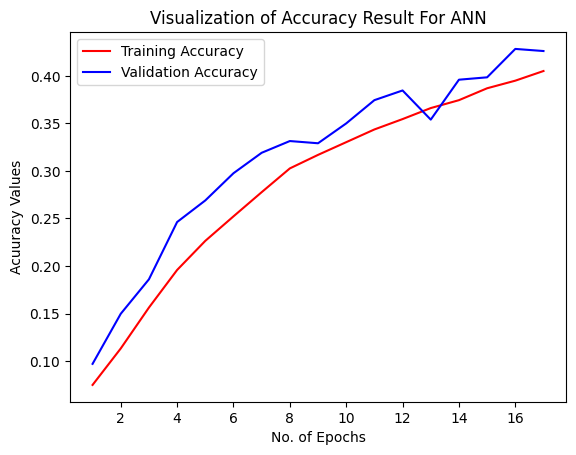

In [27]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Acuuracy Values')

plt.title('Visualization of Accuracy Result For ANN')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
class_name = test_set.class_names


In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 14s 799us/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 1,  1, 19, ..., 36, 37,  4], dtype=int64)>

### NEW imports for model report

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
report_df = classification_report(Y_true,predicted_categories,target_names=class_name,output_dict=True)
report_df = pd.DataFrame(report_df).transpose()
report_df = report_df.iloc[:-3, :]

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.51      0.26      0.34       504
                                 Apple___Black_rot       0.52      0.45      0.48       497
                          Apple___Cedar_apple_rust       0.44      0.45      0.45       440
                                   Apple___healthy       0.68      0.29      0.41       502
                               Blueberry___healthy       0.20      0.81      0.32       454
          Cherry_(including_sour)___Powdery_mildew       0.74      0.15      0.25       421
                 Cherry_(including_sour)___healthy       0.37      0.90      0.53       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.65      0.19      0.29       410
                       Corn_(maize)___Common_rust_       0.83      1.00      0.91       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.08      0.

## DATA VISUAlisation

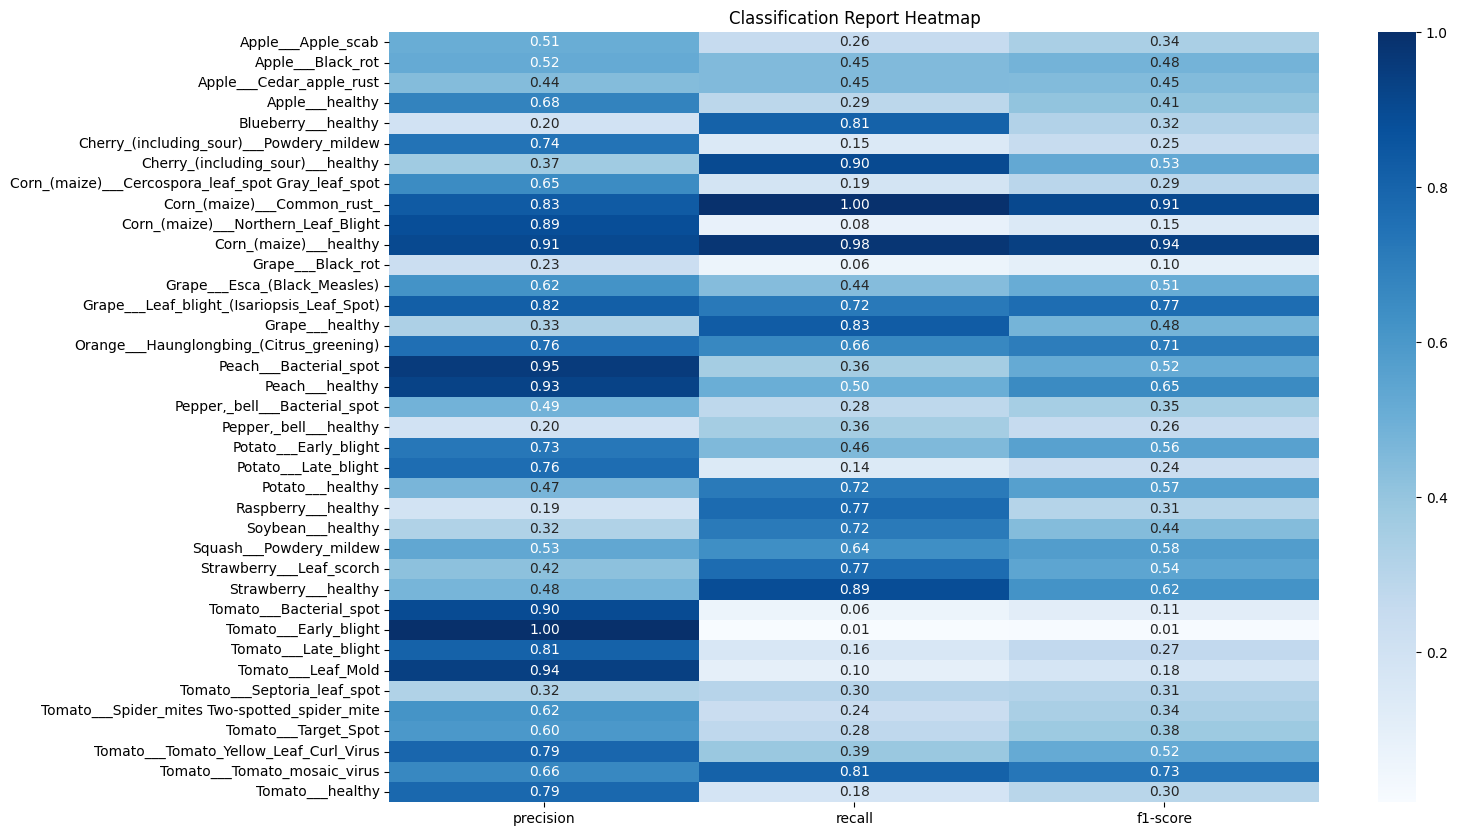

In [ ]:

plt.figure(figsize=(15,10))
sns.heatmap(report_df[['precision','recall','f1-score']], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

### Precision plot

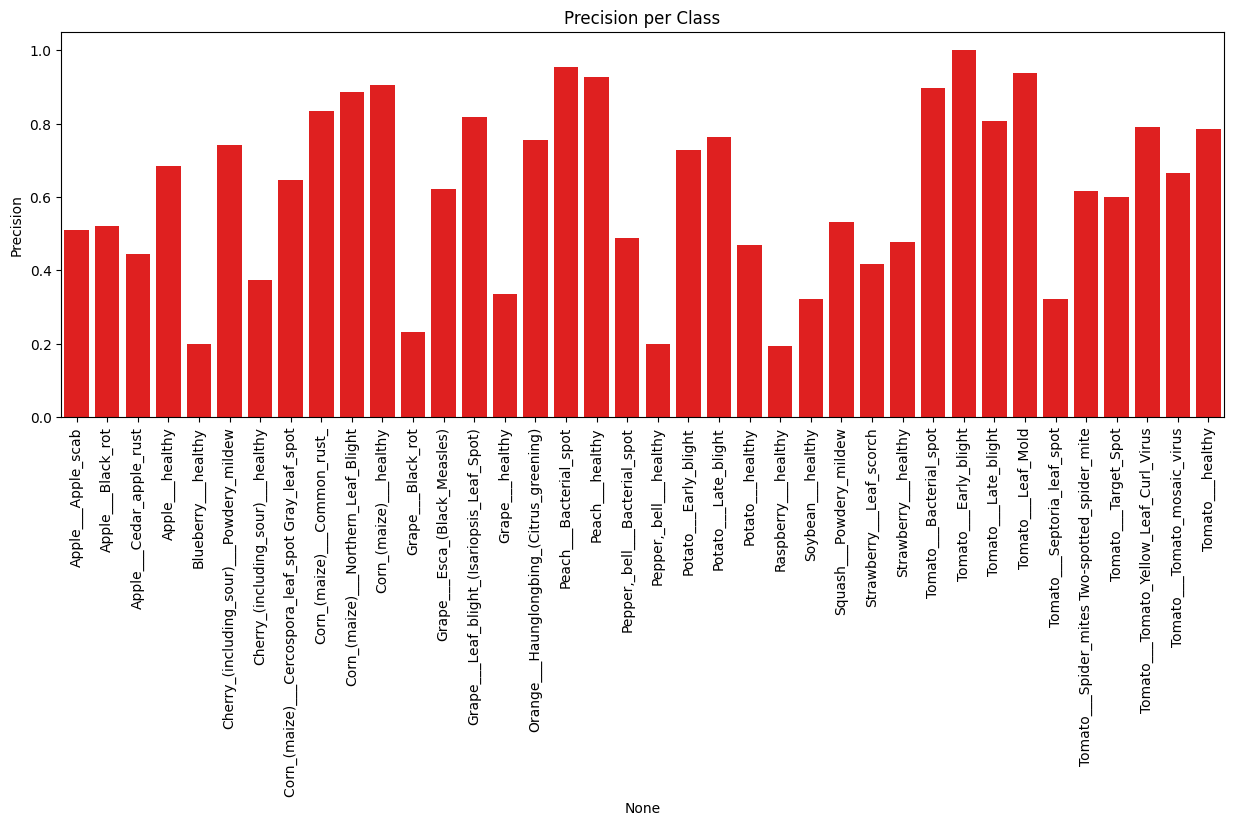

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['precision'], color='red')
plt.xticks(rotation=90)
plt.ylabel('Precision')
plt.title('Precision per Class')
plt.show()



### Recall Plot

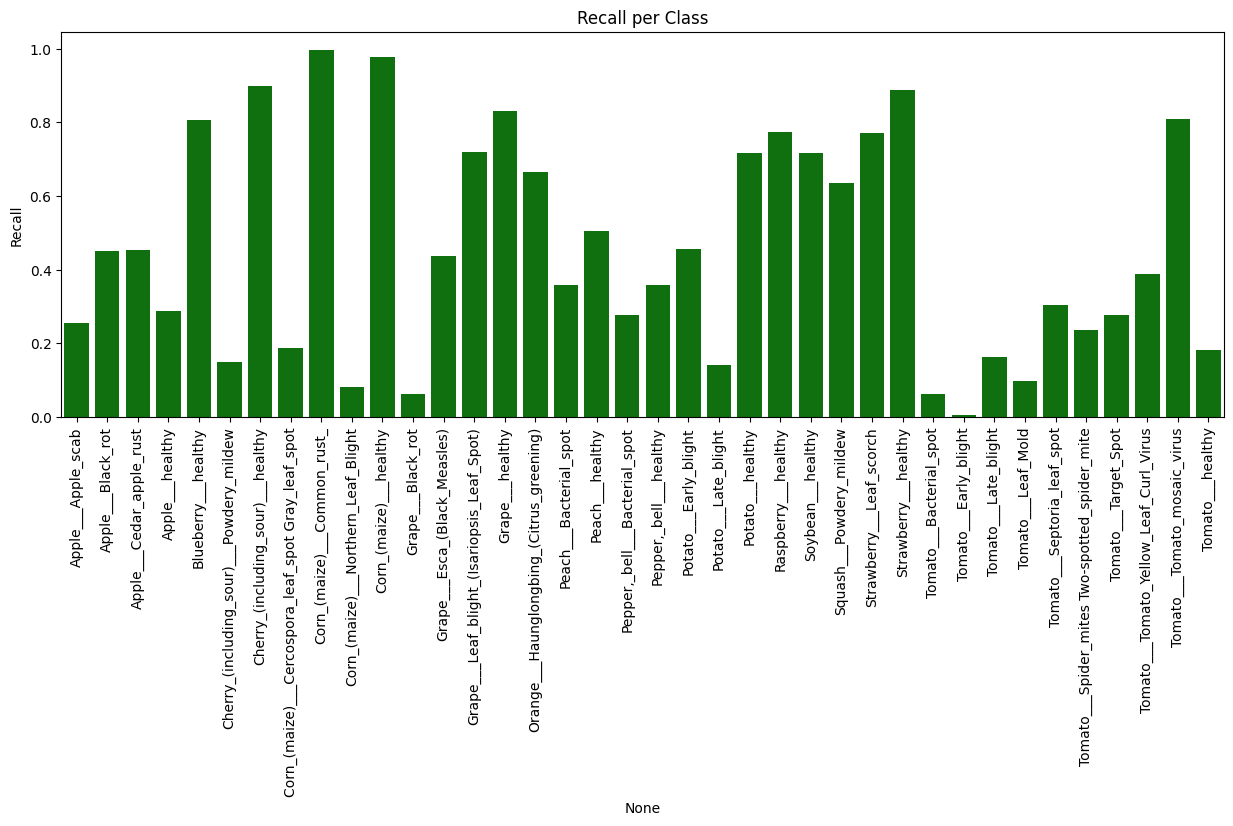

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['recall'], color='green')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.title('Recall per Class')
plt.show()


### F1-Score plot

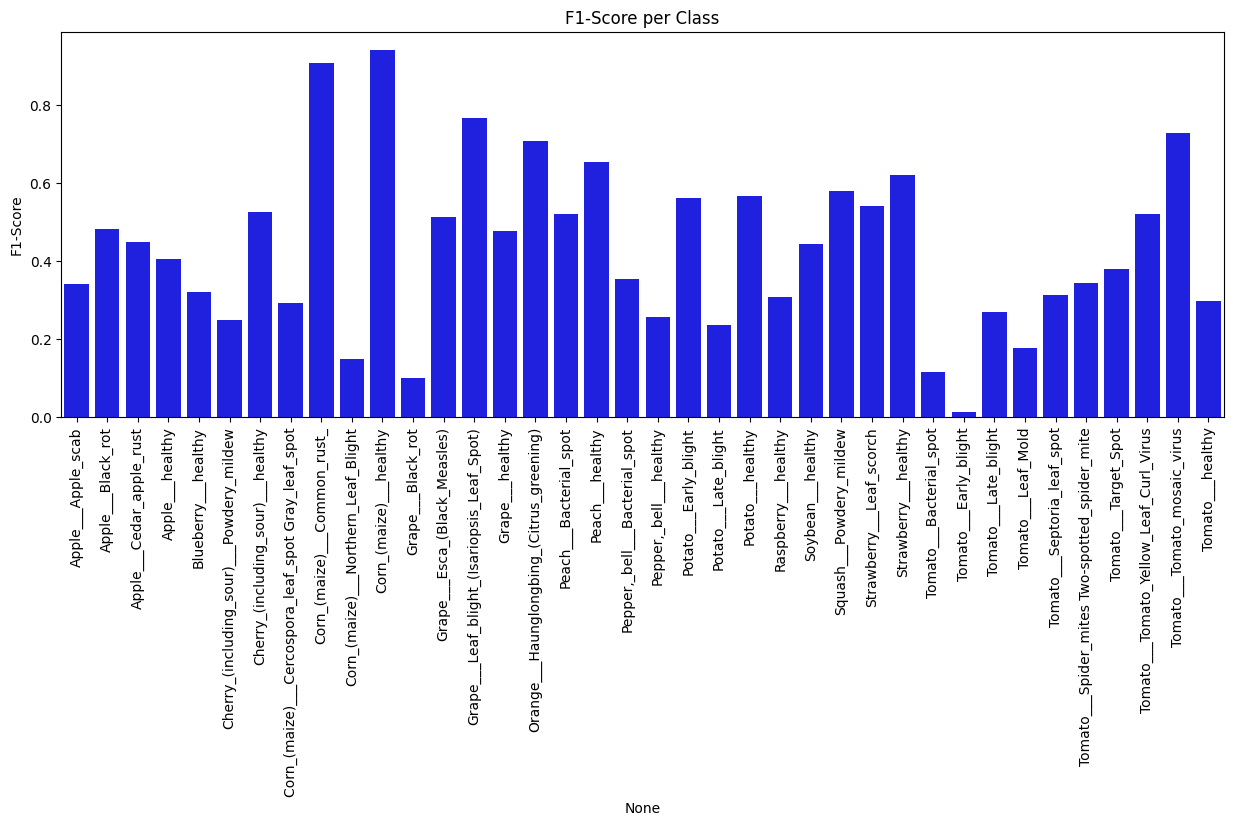

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['f1-score'], color='blue')
plt.xticks(rotation=90)
plt.ylabel('F1-Score')
plt.title('F1-Score per Class')
plt.show()


### Confusion Matrix Visualization

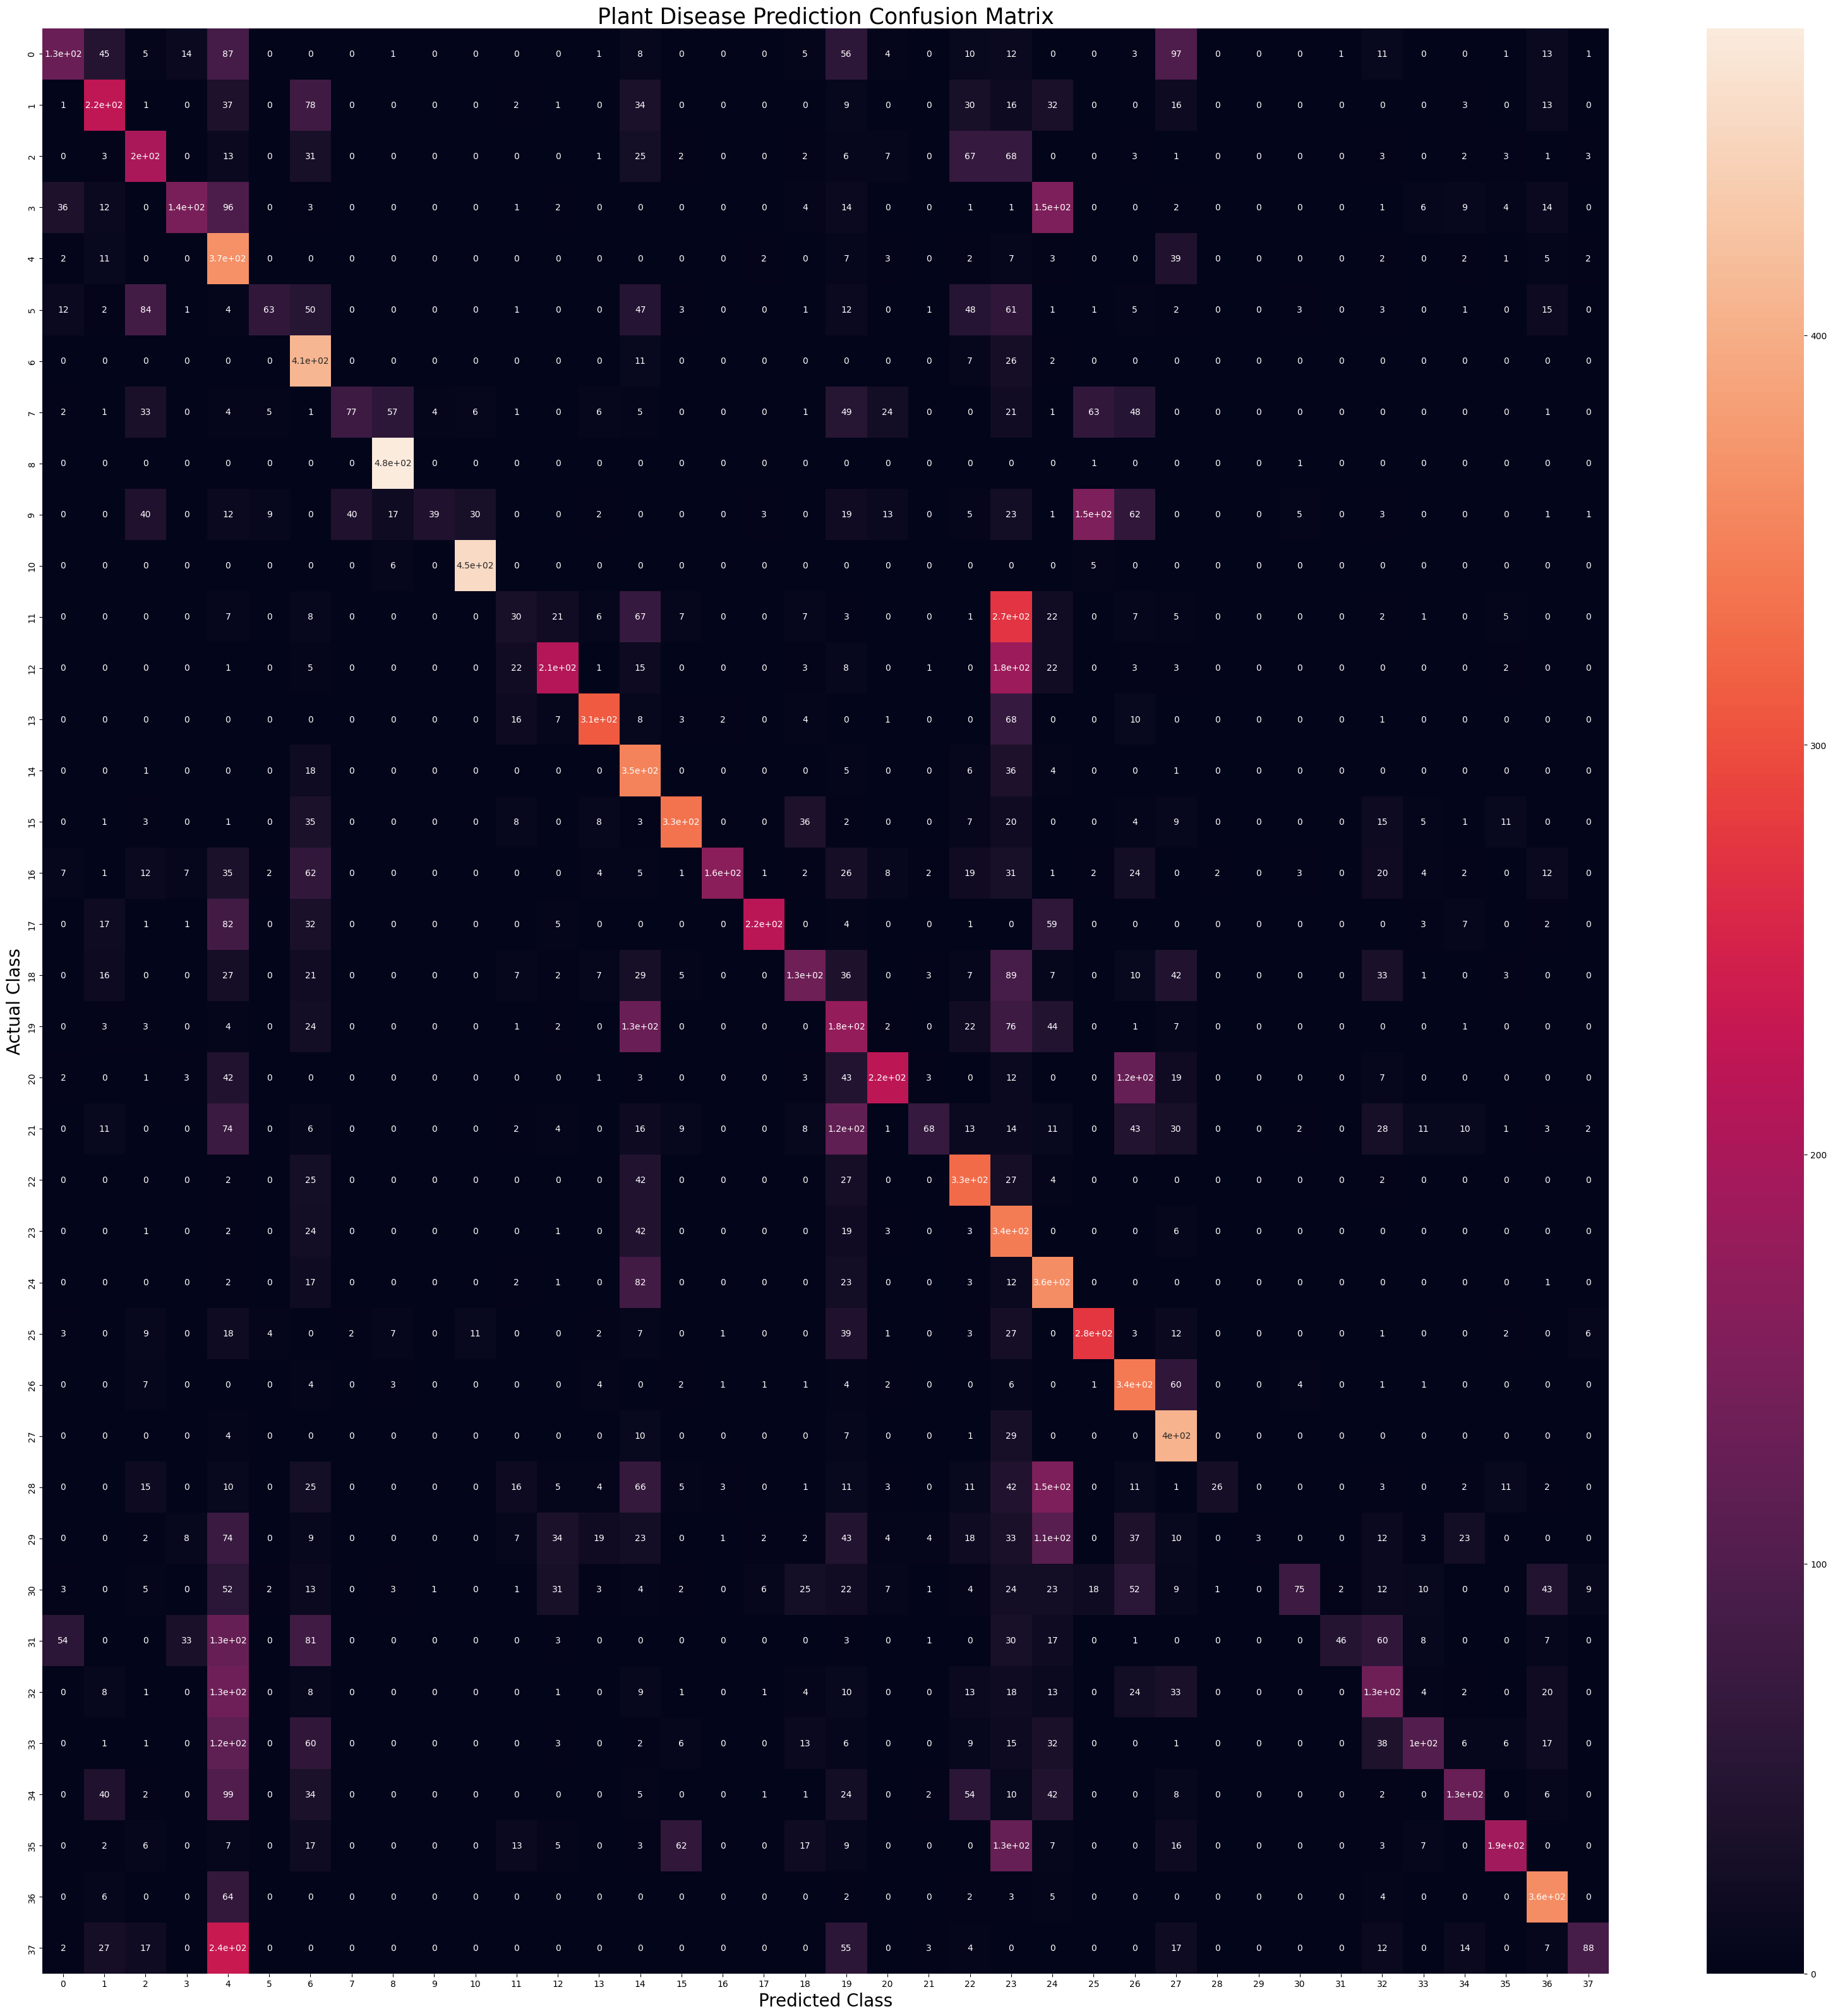

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

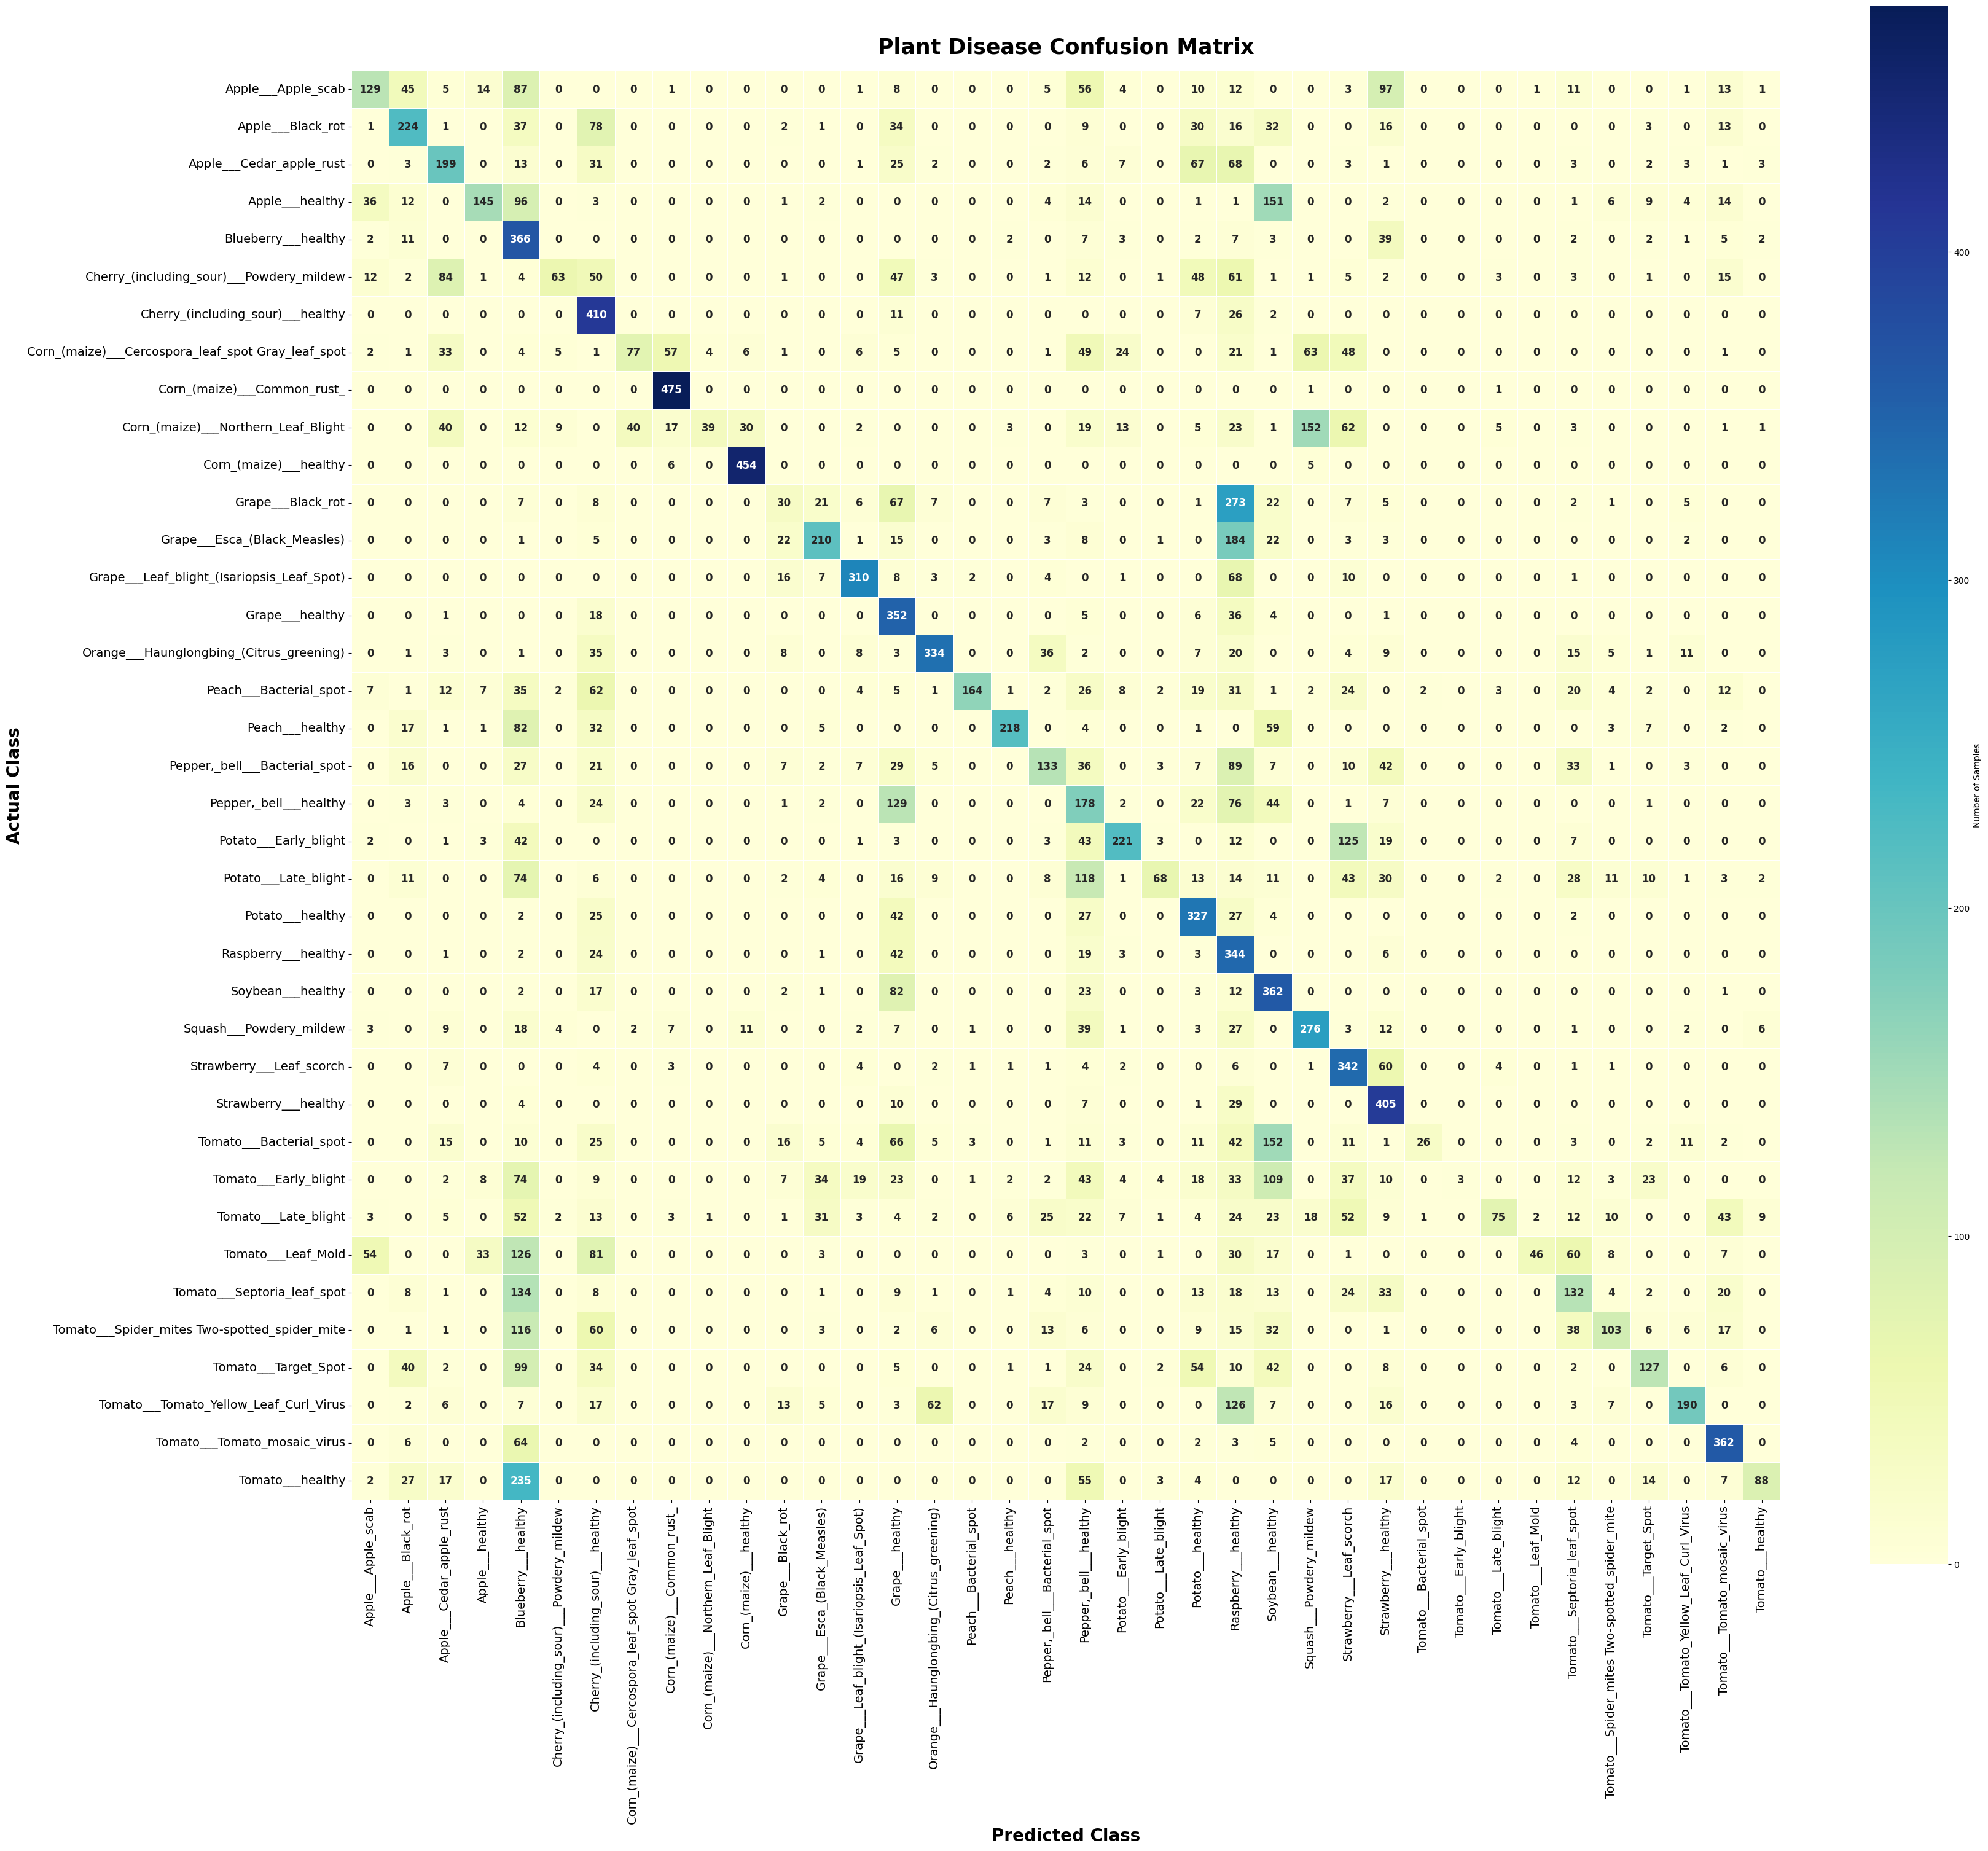

In [ ]:
plt.figure(figsize=(35, 35))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',       # beautiful gradient color
    linewidths=0.5,      # thin lines between cells
    linecolor='white',   # white lines for separation
    square=True,         # squares instead of rectangles
    cbar_kws={"shrink": 0.8, 'label': 'Number of Samples'},  # colorbar styling
    annot_kws={"size": 12, "weight": "bold"}  # font inside boxes
)

plt.xticks(ticks=np.arange(len(class_name)) + 0.5, labels=class_name, rotation=90, fontsize=14)
plt.yticks(ticks=np.arange(len(class_name)) + 0.5, labels=class_name, rotation=0, fontsize=14)

plt.xlabel('Predicted Class', fontsize=20, weight='bold')
plt.ylabel('Actual Class', fontsize=20, weight='bold')
plt.title('Plant Disease Confusion Matrix', fontsize=25, weight='bold', pad=20)

plt.tight_layout()
plt.show()
